# Describe The Stars

For this exercise, our population will be the [240 stars selected by NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification) for their examples of star classification. The aim is to use scatter diagrams to look for anything 'interesting' in the data.

The first thing to do is to look at the data. So run this code block to see a summary of it.

In [1]:
import pandas as pd

stars = pd.read_csv("../../data/smaller-datasets/Stars.csv")
print(stars.info())
print(stars.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   Luminosity      240 non-null    float64
 2   Radius          240 non-null    float64
 3   Abs_magnitude   240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
   Temperature  Luminosity  Radius  Abs_magnitude Color Spectral_Class  Type
0         3068    0.002400  0.1700          16.12   Red              M     0
1         3042    0.000500  0.1542          16.60   Red              M     0
2         2600    0.000300  0.1020          18.70   Red              M     0
3         2800    0.000200  0.1600          16.65   Red              M     0
4         1939    0.000138  0.1030    

So we can see that we have 7 columns. 

```
Temperature, Luminosity, Radius, Abs_magnitude, Color, Spectral_Class, Type
```

You can google some of these terms if you want to learn more about them. Or you can continue with the next part of the investigation.

We are going to pick two of the numerical columns and plot a scatter diagram. (There is a reason why the x-axis is reversed. It has to do with a famous diagram I hope to get to later in the course.)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown, SelectionSlider

@interact(
        x = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude"],
            value="Temperature",
            description="x-axis",
            continuous_update=False
        ),
        y = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude", "Color"],
            value="Abs_magnitude",
            description="y-axis",
            continuous_update=False
        ),
        use_log = SelectionSlider(
            options = ["given values", "logarithmic"],
            value = "given values",
            description= "mode"
        )
)
def pick_xy(x, y, use_log):
    x_vals = stars[x]
    y_vals = stars[y]

    fig, ax = plt.subplots()
    if use_log == "logarithmic":
        if y == "Color":
            ax.scatter(np.log(x_vals), y_vals)
        else:
            ax.scatter(np.log(x_vals), np.log(y_vals))
        x = "log of " + x
        y = "log of " + y
    else:
        ax.scatter(x_vals, y_vals)
    plt.gca().invert_xaxis()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter graph of "+x+" vs "+ y)
    plt.show()


interactive(children=(Dropdown(description='x-axis', options=('Temperature', 'Luminosity', 'Radius', 'Abs_magn…

There are a few selections which indicate a pattern to the data. Bear in mind: we aren't even using all the data yet. We have ignored 3 of the columns. 

Combinations I found interesting:
- `Abs_magnitude` vs `Temperature`
- `Temperature` vs `Luminosity` (especially in logarithmic mode)

## Exercise

Can you add `Color` to the y-axis so we can see if there is a relationship between colour and temperature?

<details>
<summary>Reveal suggested answer</summary>

Add the string "Color" to the list of options for the vaiable `y`:

```python
options=["Temperature", "Luminosity", "Radius", "Abs_magnitude", "Color"],
```
</details>

The blue stars seem to have a wide range of temperatures. It's hard to see how many reds we have, because they are bunched together. Try turning on logarithmic mode. It stretches out the reds and squashes the blues. 

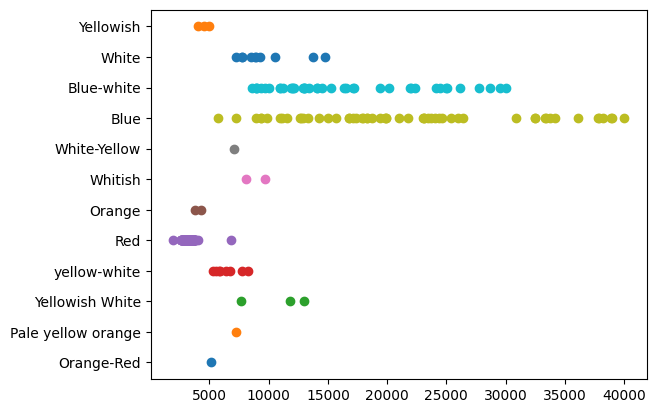

In [21]:
for color in list(set(list(stars['Color']))):
    data = stars.loc[stars['Color'] == color]
    temps = data['Temperature']
    plt.scatter(temps, len(temps) * [color])

In [58]:
# mean_data = {}

# for color in list(set(list(stars['Color']))):
#     data = stars.loc[stars['Color'] == color]
#     temps = list(data['Temperature'])
#     mean_data[color] = round(sum(temps) / len(temps), 1)

# mean_data_df = pd.DataFrame(mean_data.items(), columns=['Color', 'Mean Temperature'])
# mean_data_df.sort_values('Mean Temperature', ascending=False)

stars.groupby("Color")["Temperature"].mean().reset_index(name="mean temperature").sort_values(by="mean temperature", ascending=False).round(1)


,Color,mean temperature
0,Blue,21918.3
1,Blue-white,16660.0
10,Yellowish White,10826.7
6,White,9720.3
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6466.2
3,Orange-Red,5112.0
9,Yellowish,4527.7


In [59]:
stars.groupby("Color")["Temperature"].median().reset_index(name="median temperature").sort_values(by="median temperature", ascending=False).round(1)

,Color,median temperature
0,Blue,19921.5
1,Blue-white,14100.0
10,Yellowish White,11790.0
6,White,8879.5
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6158.0
3,Orange-Red,5112.0
9,Yellowish,4526.0


<Axes: >

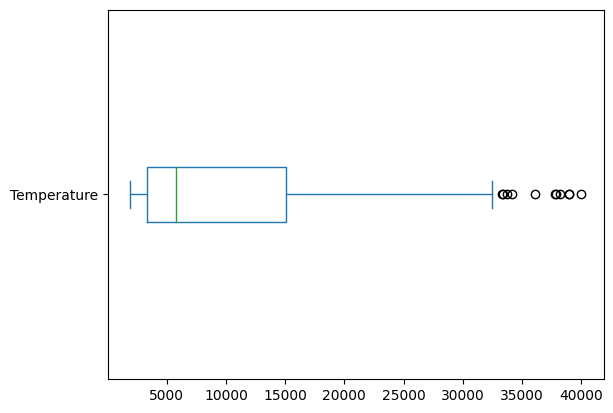

In [62]:
stars.Temperature.plot.box(vert = False)

In [70]:
above_upp_quart = stars.Temperature.quantile(3/4) + 1.5 * (stars.Temperature.quantile(3/4) - stars.Temperature.quantile(1/4)) 
above_upp_quart

32622.375

There were no outliers to the left of our box-plot of star temperatures, so there were no "cold" stars that were found to be outliers. But there are still a group of stars we can regard as the coldest 2% of stars in our dataset. Find them.

In [73]:
low_limit = stars.Temperature.quantile(2/100)
cold_stars = stars[stars['Temperature'] <= low_limit]
cold_stars

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
2,2600,0.000300,0.102,18.70,Red,M,0
4,1939,0.000138,0.103,20.06,Red,M,0
6,2637,0.000730,0.127,17.22,Red,M,0
7,2600,0.000400,0.096,17.40,Red,M,0
78,2621,0.000600,0.098,12.81,Red,M,1


It may be worth noting that all of the coldest 2% of stars are red and of spectral class M. However, it is worth noting that red stars are by a large margin the most frequent, with twice as many red stars as the second most populous stars. 

Red stars had the lowest mean and median temperature calculated earlier though so this conclusion about the coldest stars being red stars is backed up by that information.  